In [1]:
import numpy as np
import random 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

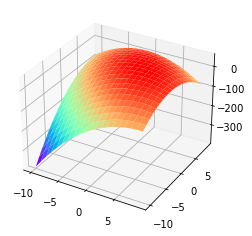

In [2]:


n=30 #种群大小
m=20 #迭代次数
def f(x1,x2,a,b): #适应度函数
    return (x1-a)**2+(x2-b)**2
c1=2 #自我学习因子
c2=2 #全局学习因子
w=1 #惯性系数
maxV=1 #最大速率

#以函数 z = -x**2-y**2+7*x+6*y-x*y+40 作为食物分布：
def getQuality(position):
    return -position[0]**2-position[1]**2+7*position[0]+6*position[1]-position[0]*position[1]+40

#绘图
fig = plt.figure()
ax3 = plt.axes(projection='3d')
xx = np.arange(-10,10,1)
yy = np.arange(-10,10,1)
X, Y = np.meshgrid(xx, yy)
Z = -X**2-Y**2+7*X+6*Y-X*Y+40
ax3.plot_surface(X,Y,Z,cmap='rainbow')
plt.show()

In [3]:
#定义鸟的类
class bird:
    
    def __init__(self, speed, position):
        self.speed = speed
        self.position = position
        self.pBest = position

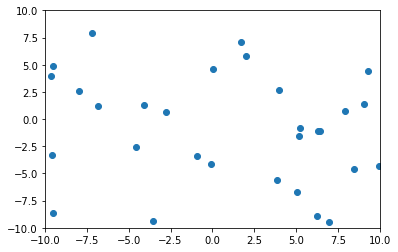

In [4]:
#初始化种群，在x和y均为(-10,10)的范围内生成随机点
birds = []
for i in range(n):
    tSpeed = np.array([random.random(), random.random()])
    tPosition = np.array([20*random.random()-10, 20*random.random()-10])
    birds.append(bird(tSpeed, tPosition))
    
#绘图
x = []
y = []
for j in range(n):
    x.append(birds[j].pBest[0])
    y.append(birds[j].pBest[1])
plt.scatter(x, y)
plt.xlim(xmin=-10,xmax=10)
plt.ylim(ymin=-10,ymax=10)
plt.show()

In [5]:
#更新种群

#获取全局最优
def GetGBest():
    g = birds[0].pBest
    for i in range(1,n):
        if (getQuality(birds[i].pBest) > getQuality(g)):
            g = birds[i].pBest
    return g

#更新速度和位置
def updateBirds(birds):
    for i in range(n):
        tSpeed = w*birds[i].speed + c1*random.random()*(birds[i].pBest-birds[i].position)+c2*random.random()*(gBest-birds[i].position)
        v = (tSpeed[0]**2+tSpeed[1]**2)**0.5
        if (v > maxV):
            birds[i].speed = tSpeed*maxV/v
        else:
            birds[i].speed = tSpeed
        birds[i].position = birds[i].position + birds[i].speed
        if (getQuality(birds[i].position) > getQuality(birds[i].pBest)):
            birds[i].pBest = birds[i].position

第1次迭代，最佳位置：[3.98556006 2.66866275]，最大值：50.26833138283663


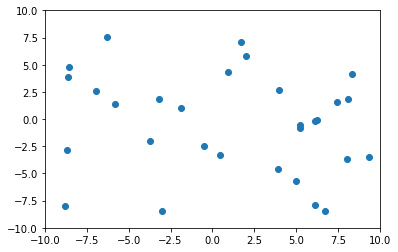

第2次迭代，最佳位置：[3.98556006 2.66866275]，最大值：50.26833138283663


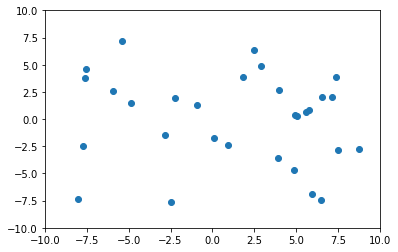

第3次迭代，最佳位置：[1.84333769 3.85199151]，最大值：50.6790593342256


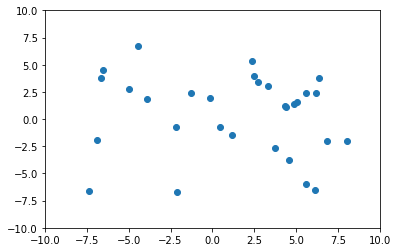

第4次迭代，最佳位置：[4.33115909 1.18015684]，最大值：52.13589841495737


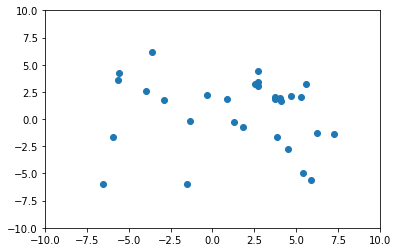

第5次迭代，最佳位置：[3.71412706 1.81420276]，最大值：53.059854938989645


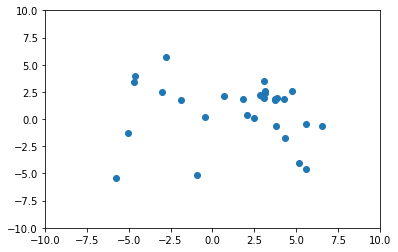

第6次迭代，最佳位置：[3.11309507 1.90411421]，最大值：53.97165034678395


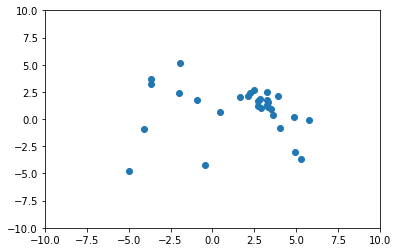

第7次迭代，最佳位置：[2.73259434 1.64065085]，最大值：54.330025214856406


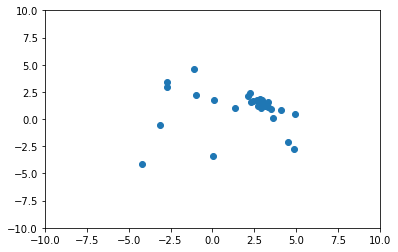

第8次迭代，最佳位置：[2.73259434 1.64065085]，最大值：54.330025214856406


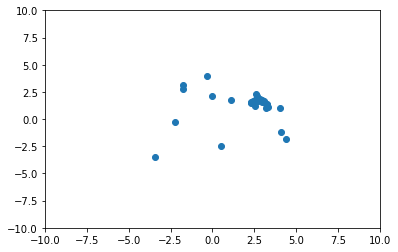

第9次迭代，最佳位置：[2.73259434 1.64065085]，最大值：54.330025214856406


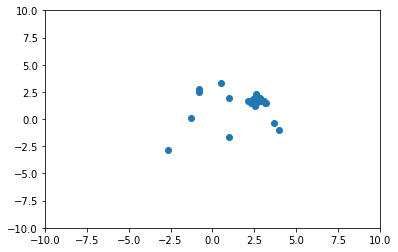

第10次迭代，最佳位置：[2.62426379 1.69226131]，最大值：54.33196553007244


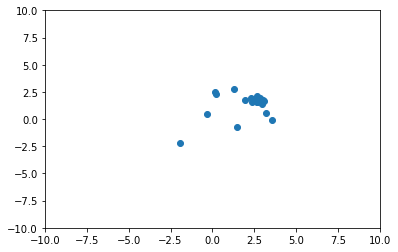

第11次迭代，最佳位置：[2.62426379 1.69226131]，最大值：54.33196553007244


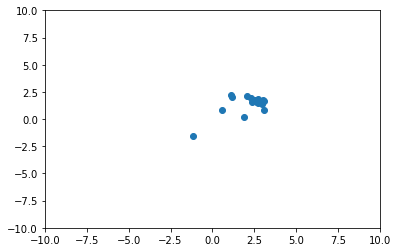

第12次迭代，最佳位置：[2.64899651 1.70059234]，最大值：54.33246961976789


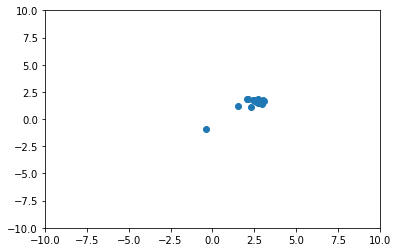

第13次迭代，最佳位置：[2.64899651 1.70059234]，最大值：54.33246961976789


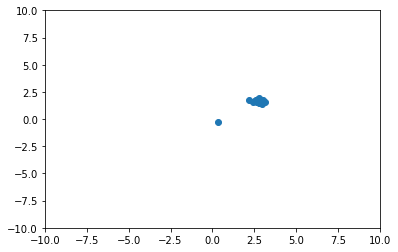

第14次迭代，最佳位置：[2.64899651 1.70059234]，最大值：54.33246961976789


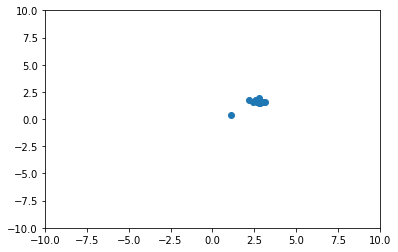

第15次迭代，最佳位置：[2.68343915 1.65663481]，最大值：54.33311963802065


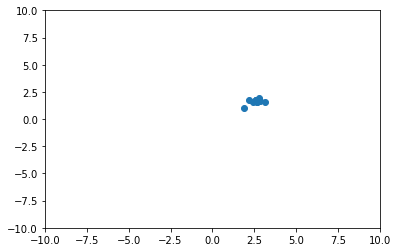

第16次迭代，最佳位置：[2.68343915 1.65663481]，最大值：54.33311963802065


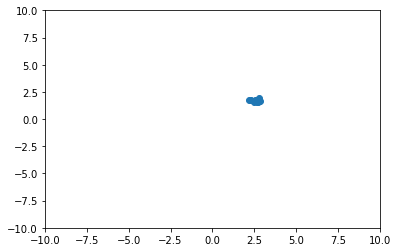

第17次迭代，最佳位置：[2.67628702 1.6576001 ]，最大值：54.33324580314806


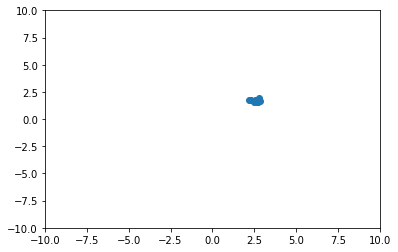

第18次迭代，最佳位置：[2.67628702 1.6576001 ]，最大值：54.33324580314806


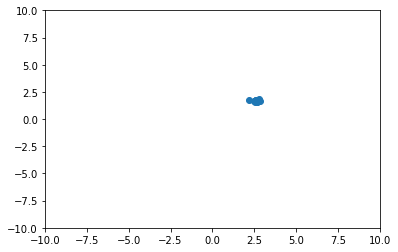

第19次迭代，最佳位置：[2.67272658 1.66387002]，最大值：54.33330573700606


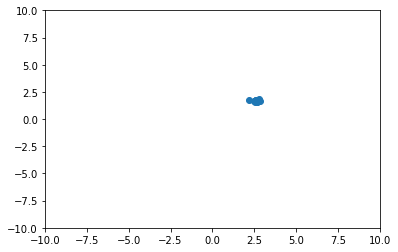

第20次迭代，最佳位置：[2.67272658 1.66387002]，最大值：54.33330573700606


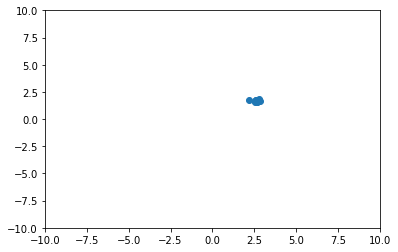

54.33330573700606 [2.67272658 1.66387002]


In [6]:
#开始迭代，共m次
for i in range(m):
    gBest = GetGBest()
    updateBirds(birds)
    print("第"+str(i+1)+"次迭代，最佳位置："+str(gBest)+"，最大值："+str(getQuality(gBest)))
    #绘图
    x = []
    y = []
    for j in range(n):
        x.append(birds[j].pBest[0])
        y.append(birds[j].pBest[1])
    plt.scatter(x, y)
    plt.xlim(xmin=-10,xmax=10)
    plt.ylim(ymin=-10,ymax=10)
    plt.show()
        
#获得结果
print(getQuality(gBest), gBest)